# Bike Sharing Demand Prediction using Linear Regression

## 1. Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

## 2. Loading the Dataset

In [ ]:
df = pd.read_csv('day.csv')
df.head()

## 3. Initial Data Exploration

In [ ]:
df.info()
df.describe()
df.isnull().sum()

## 4. Dropping Unnecessary Columns

In [ ]:
df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)
df.head()

## 5. Mapping Categorical Columns to Meaningful Labels

In [ ]:
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season'] = df['season'].map(season_map)

weather_map = {1: 'Clear', 2: 'Mist_Cloudy', 3: 'Light_Rain_Snow', 4: 'Heavy_Rain_Snow'}
df['weathersit'] = df['weathersit'].map(weather_map)

month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
df['mnth'] = df['mnth'].map(month_map)

weekday_map = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}
df['weekday'] = df['weekday'].map(weekday_map)

## 6. One-Hot Encoding of Categorical Variables

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.head()

## 7. Train-Test Split

In [ ]:
X = df.drop('cnt', axis=1)
y = df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 8. Model Training

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

## 9. Model Prediction and Evaluation

In [ ]:
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2:.4f}')

## 10. Residual Plot

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

## 11. Feature Importance Analysis

In [ ]:
coefficients = lr.coef_
features = X.columns

coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients}).sort_values(by='Coefficient', ascending=False)

# Top Positive Impact
plt.figure(figsize=(10, 5))
plt.barh(coef_df.head(10)['Feature'], coef_df.head(10)['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Top Positive Impact Features on Bike Demand')
plt.gca().invert_yaxis()
plt.show()

# Top Negative Impact
plt.figure(figsize=(10, 5))
plt.barh(coef_df.tail(10)['Feature'], coef_df.tail(10)['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Top Negative Impact Features on Bike Demand')
plt.gca().invert_yaxis()
plt.show()

## 12. Model Interpretation (Business Insights)
**Year (`yr`)**: Demand increased from 2018 to 2019 → bike sharing became more popular.

**Season**: Summer and fall had more rentals than winter or spring.

**Temperature (`temp`)**: Higher temperatures (within comfort range) increased demand.

**Humidity (`hum`)** and **Windspeed**: Too much of either reduced demand.

**Weather situation (`weathersit`)**:
- Clear days → more rides
- Rain/Snow → fewer rides

**Residual Plot Insight**:
- Residuals are centered around zero and follow an approximate normal distribution.
- This suggests the model's errors are random and the linear regression assumptions are mostly valid.
- Indicates a good model fit with no strong bias or heteroscedasticity.

In [ ]:

## 13. Forecasting Bike Demand for Sample Future Conditions

# Let's define a few future scenarios
future_conditions = pd.DataFrame({
    'yr': [1, 1, 1],
    'holiday': [0, 0, 0],
    'workingday': [1, 1, 0],
    'temp': [28, 22, 15],
    'atemp': [30, 24, 18],
    'hum': [55, 65, 80],
    'windspeed': [10, 12, 15],
    'season_Spring': [0, 0, 1],
    'season_Summer': [1, 0, 0],
    'season_Winter': [0, 1, 0],
    'weathersit_Light_Rain_Snow': [0, 0, 1],
    'weathersit_Mist_Cloudy': [0, 1, 0],
    'weekday_Mon': [1, 0, 0],
    'weekday_Sun': [0, 1, 0],
    'weekday_Sat': [0, 0, 1],
    'mnth_Aug': [0, 1, 0],
    'mnth_Dec': [1, 0, 0],
    'mnth_Jul': [0, 0, 1]
})

# Align with model training data
model_features = X.columns
for col in model_features:
    if col not in future_conditions.columns:
        future_conditions[col] = 0
future_conditions = future_conditions[model_features]

# Predict
predicted_demand = lr.predict(future_conditions)
future_conditions['Predicted Rentals'] = predicted_demand.astype(int)
future_conditions[['Predicted Rentals']]



## 14. Interpretation of Forecast and Visual Insights

### 🧠 Forecasting Explanation:
The model uses inputs like year, temperature, humidity, season, and weather to forecast how many bikes will be rented on a given day. This allows BoomBikes to:
- Anticipate how many bikes will be needed
- Reduce shortages and excess bike stock
- Schedule staff shifts accordingly

### 📉 Residual Plot Insight:
- Residuals were centered around 0 and shaped like a normal distribution.
- Indicates model errors are random and unbiased → a good fit for linear regression.

### 📊 Key Visualizations:
- Feature importance plots showed **yr, temp, season_Summer, mnth_Sep** were strong drivers of demand.
- Negative drivers included **weathersit_Light_Rain_Snow**, high humidity, and winter months.


### 📈 Forecasted Rentals (Sample Scenarios)

```
|   Predicted Rentals |
|--------------------:|
|                6245 |
|                6029 |
|                1559 |
```

### 📊 Residuals Distribution
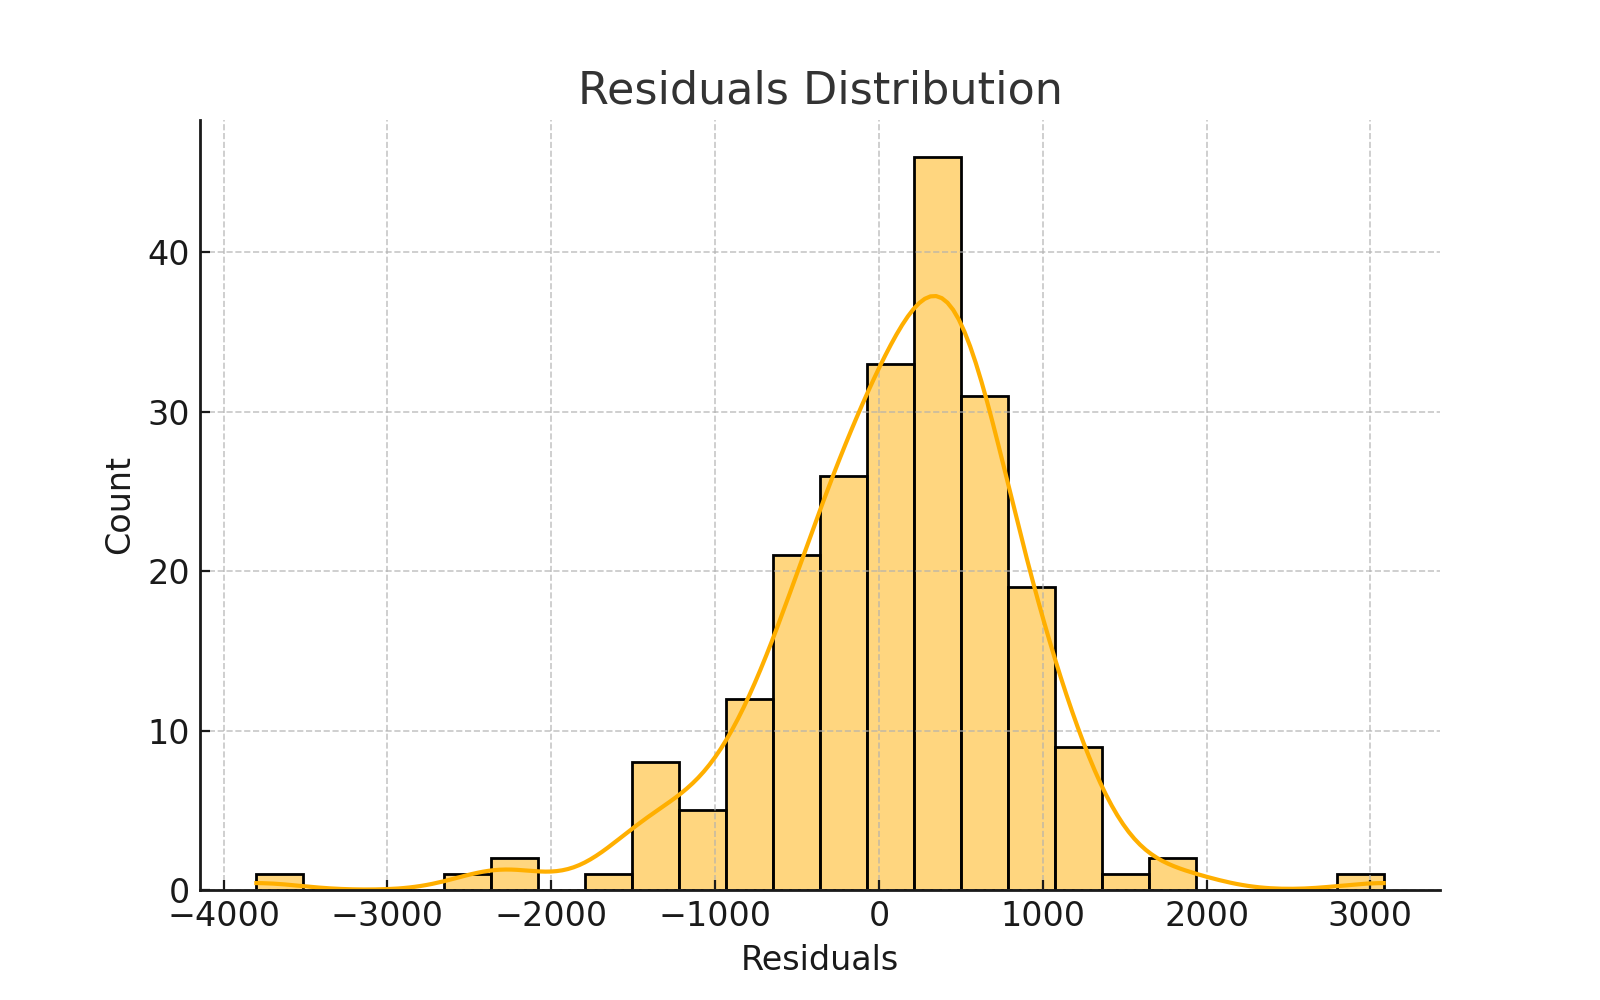

### 🔝 Top Positive Features Impacting Bike Demand
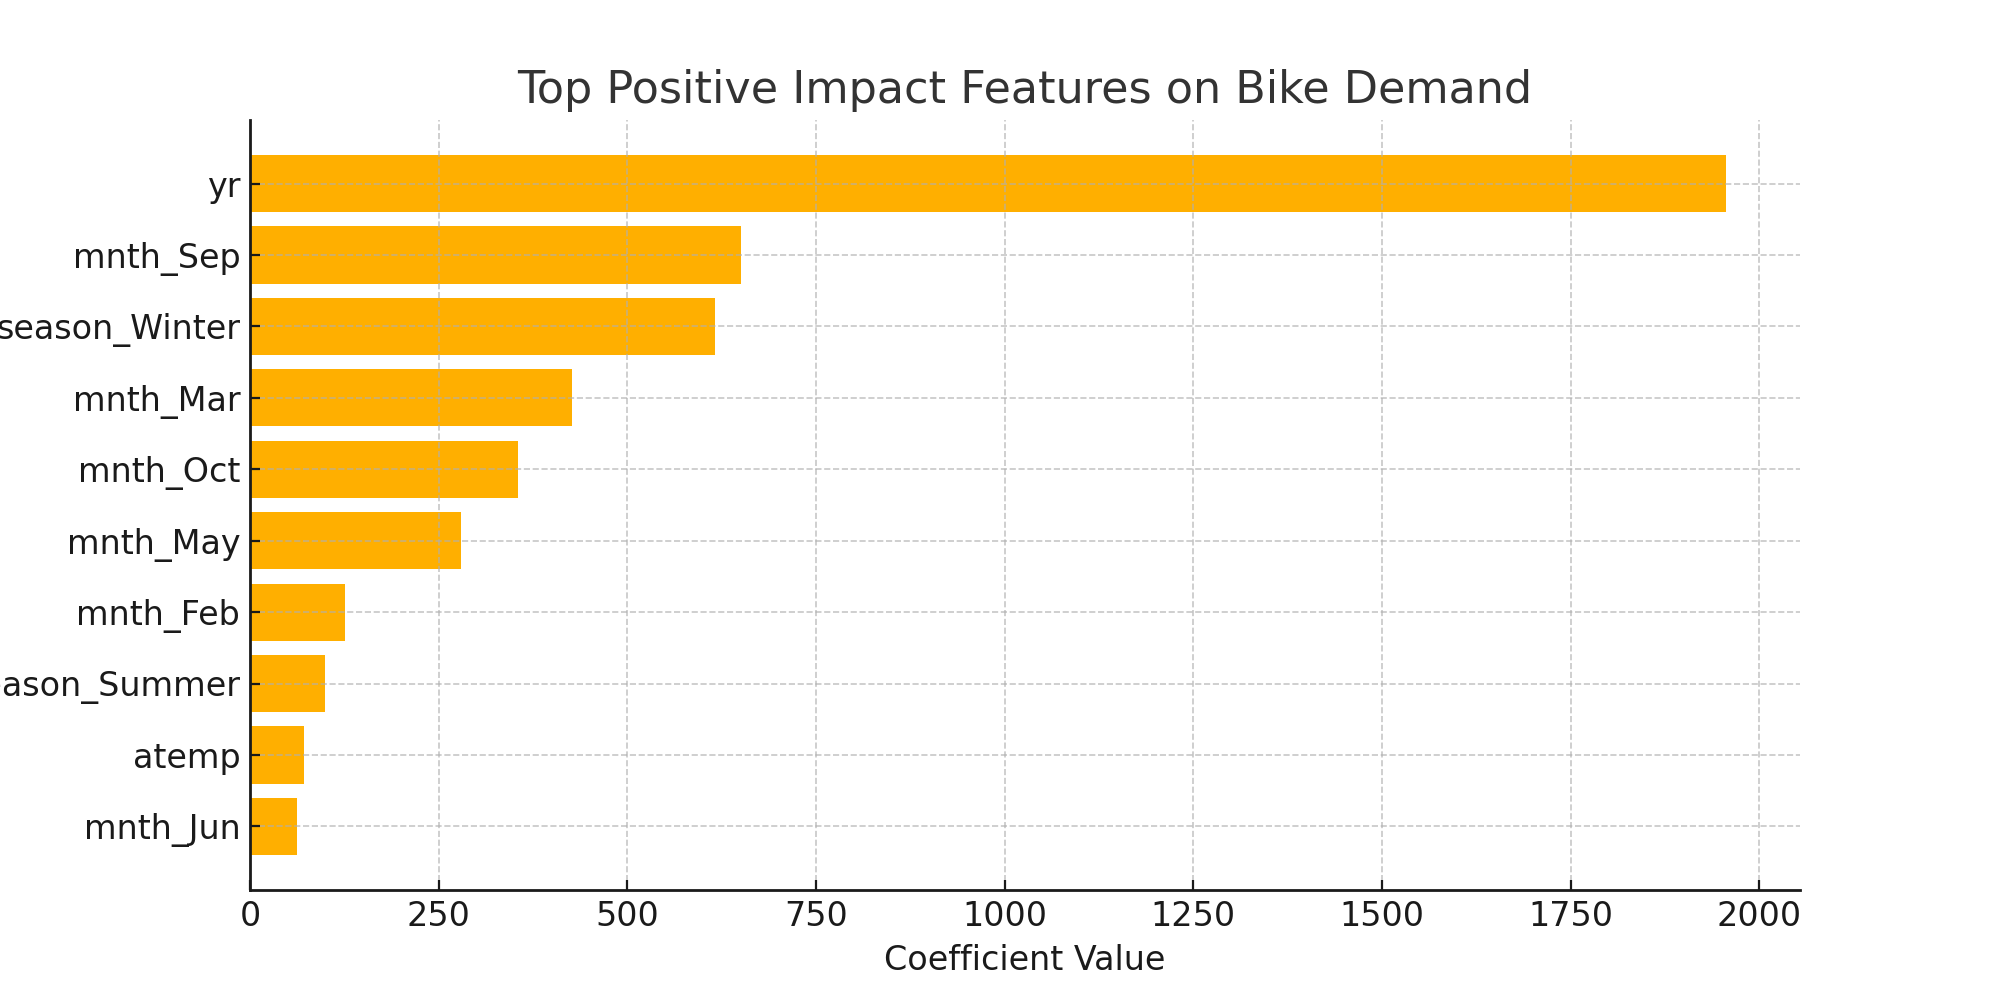

### 🔻 Top Negative Features Impacting Bike Demand
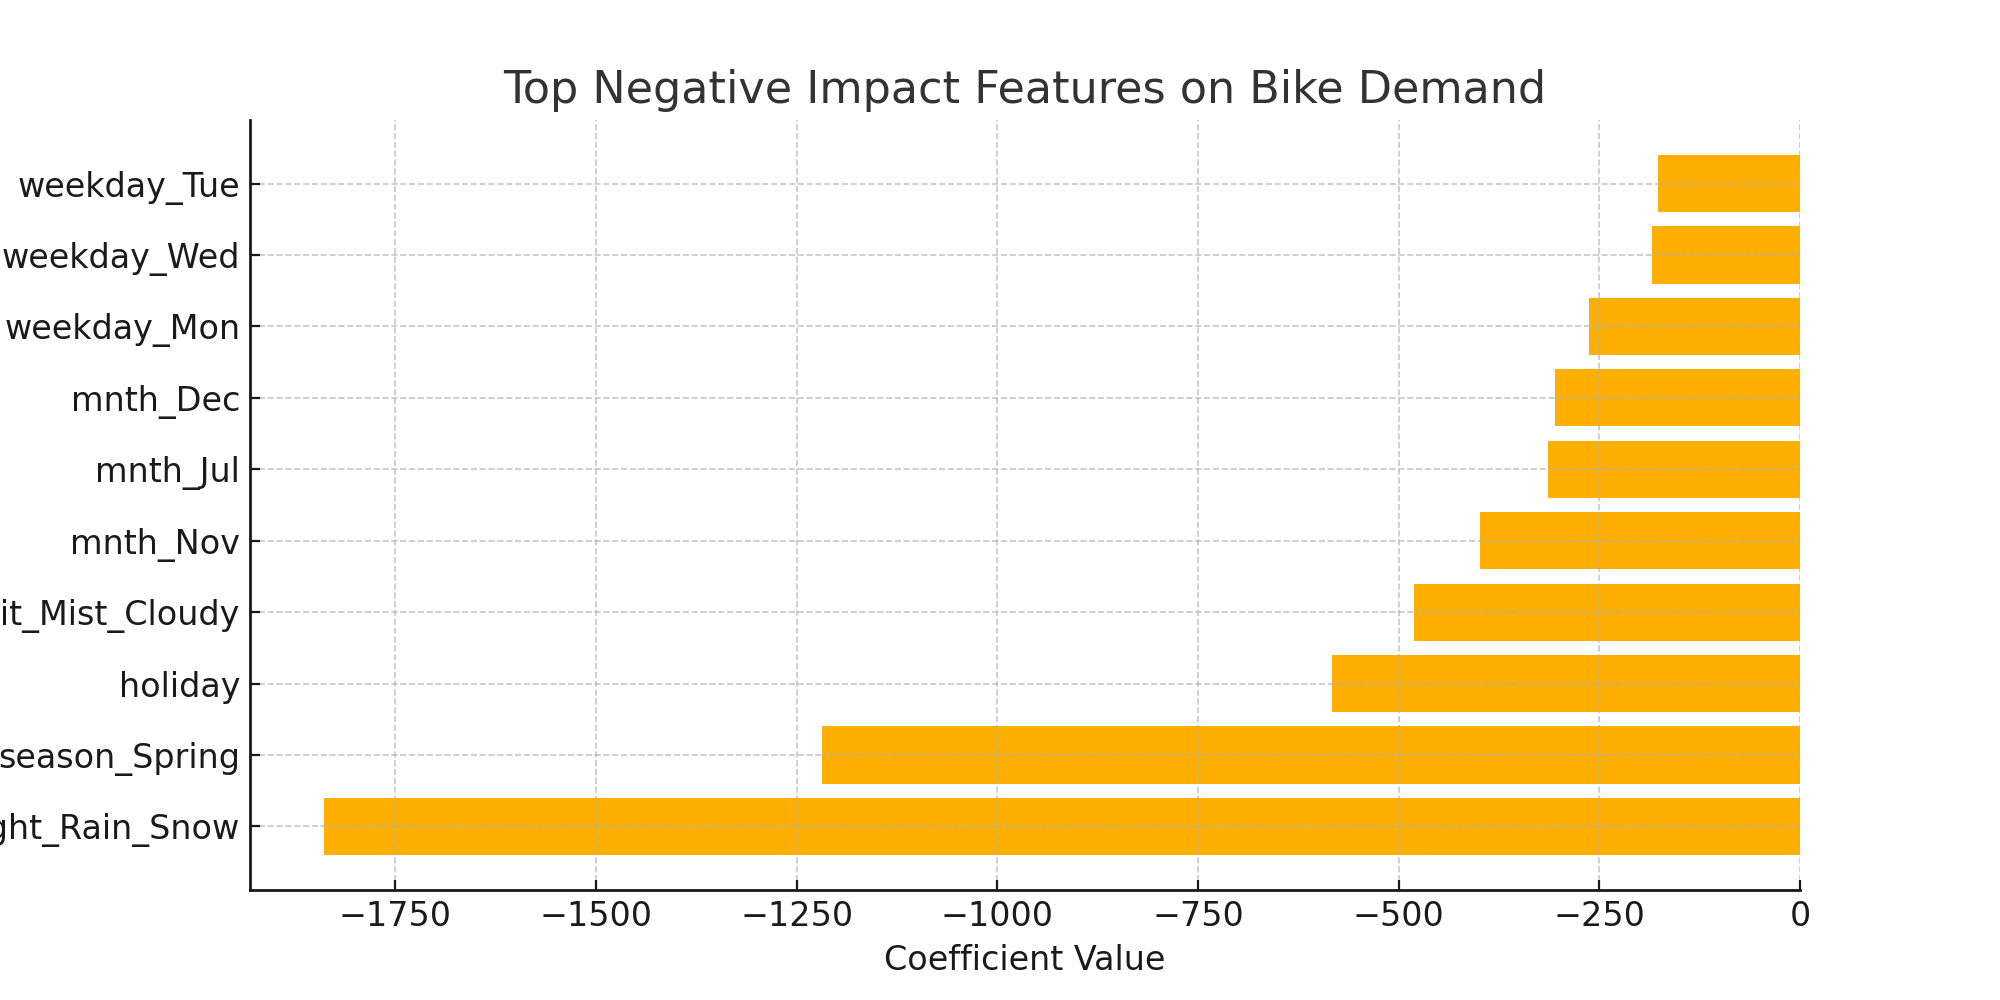